In [1]:
# load the module
%load_ext autoreload
%autoreload 2

from problem_generation.Generate_M2S import MAX2SAT
from problem_generation.Generate_MIS import MIS
from expval_calculation.SingleLayerQAOA import SingleLayerQAOAExpectationValues
from QIRO_M2S import QIRO_MAX_2SAT
from QIRO_MIS import QIRO_MIS
import networkx as nx

import classical_benchmarks.Parallel_Tempering as PT
import classical_benchmarks.Simulated_Annealing as SA

## Maximum Independent Set (MIS)

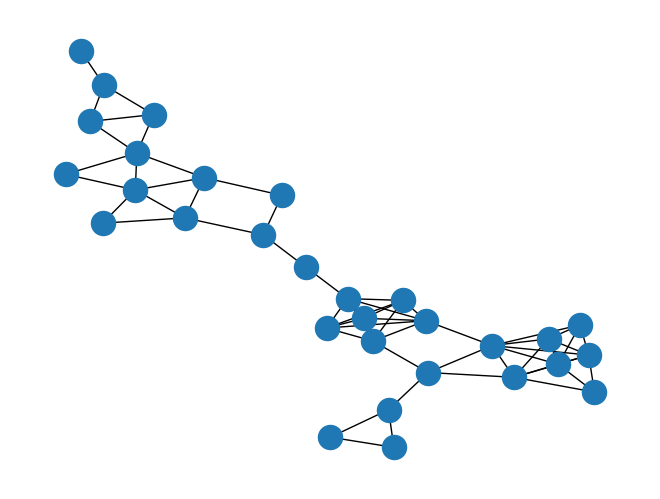

In [2]:
# create some test graph. Feel free to change this to whatever graph you want to visualize and use.
# number of nodes
number_of_nodes = 30
# density
radius = 0.25

graph = nx.random_geometric_graph(number_of_nodes, radius, seed=11)

nx.draw_kamada_kawai(graph)

In [3]:
# Choose a penalty factor \alpha and create a MIS problem instance for QIRO
alpha = 1.1
seed = 420
mis_problem = MIS(graph=graph, alpha=alpha, seed=seed) 
# create the matrices required for computation:
mis_problem.graph_to_matrix()

In [4]:
# we define the object that is used for calculating expectation values of the Z, ZZ operators
# as given by p=1 QAOA.
# Different methods of computing these will be added in the future.
mis_expval = SingleLayerQAOAExpectationValues(mis_problem)

In [5]:
# problem size that we brute-force:
n_c = 3
# instantiate a QIRO object:
qmis = QIRO_MIS(nc_input=n_c, expectation_values_input=mis_expval)

qmis.execute()

Step: 1. Number of nodes: 30.


/Users/q521093/opt/anaconda3/envs/rqaoa/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/q521093/opt/anaconda3/envs/rqaoa/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


single var [10]. Sign: -1
Pruned 0 variables.
We have fixed the following variables: [[10]]. Moving on.
Step: 2. Number of nodes: 29.
single var [30]. Sign: -1
Pruned 0 variables.
We have fixed the following variables: [[30]]. Moving on.
Step: 3. Number of nodes: 28.
single var [5]. Sign: -1
Pruned 0 variables.
We have fixed the following variables: [[5]]. Moving on.
Step: 4. Number of nodes: 27.
single var [13]. Sign: -1
Pruned 0 variables.
We have fixed the following variables: [[13]]. Moving on.
Step: 5. Number of nodes: 26.
single var [27]. Sign: -1
Pruned 0 variables.
We have fixed the following variables: [[27]]. Moving on.
Step: 6. Number of nodes: 25.
Correlation [29, 7]. Sign: -1.
Pruned 0 variables.
No variables could be fixed.
Attempting with the 1. largest correlation.
Correlation [20, 25]. Sign: -1.
Pruned 0 variables.
No variables could be fixed.
Attempting with the 2. largest correlation.
Correlation [11, 22]. Sign: -1.
Pruned 0 variables.
No variables could be fixed.
At

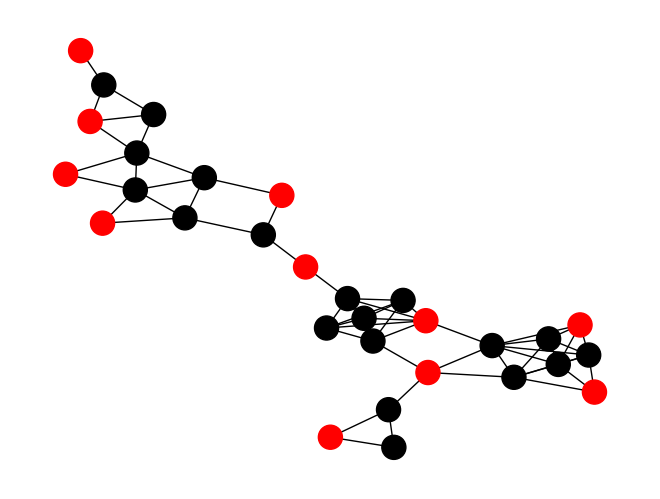

In [6]:
# visualize the solution:
nx.draw_kamada_kawai(graph, node_color=[("k", "r")[int(x > 0)] for x in qmis.solution])


## MAX-2-SAT

We begin by creating a MAX-2-SAT instance:

In [7]:
# number of variables and clauses:
num_var = 20
num_clauses = 100
seed = 420
# generate a random problem instance
max_sat_problem = MAX2SAT(num_var=num_var, num_clauses=num_clauses, seed=seed)
# we generate a formula according to the prescribed parameters
max_sat_problem.generate_formula()
# we generate the corresponding Hamiltonian matrix
max_sat_problem.SAT_to_Hamiltonian()


##### Let's run QIRO on it:

In [8]:
# we define the object that is used for calculating expectation values of the Z, ZZ operators
# as given by p=1 QAOA.
# Different methods of computing these will be added in the future.
max_sat_expval = SingleLayerQAOAExpectationValues(max_sat_problem)

In [9]:
# problem size that we brute-force:
n_c = 3
# perform backtracking true/false
perform_backtracking = True
# instantiate a QIRO object:
qm2s = QIRO_MAX_2SAT(nc_input=n_c, expectation_values_input=max_sat_expval)
# run QIRO
backtracked_energy, initial_energy, initial_solution, backtracked_solution \
    = qm2s.execute(backtracking=perform_backtracking)

print(f"Energy found: {initial_energy}.")
if perform_backtracking:
    print(f"Energy found after backtracking: {backtracked_energy}")

Energy found: 11.
Energy found after backtracking: 10


Note: if you want to run the QIRO procedure again you should reevaluate the problem generation and definition cells above!! The seed parameter ensures the reproducability of results :-)

### RQAOA

In [10]:
from misc.RQAOA import RQAOA

In [11]:
# number of variables and clauses:
num_var = 20
num_clauses = 100
seed = 420
# generate a random problem instance
max_sat_problem = MAX2SAT(num_var=num_var, num_clauses=num_clauses, seed=seed)
# we generate a formula according to the prescribed parameters
max_sat_problem.generate_formula()
# we generate the corresponding Hamiltonian matrix
max_sat_problem.SAT_to_Hamiltonian()

max_sat_expval = SingleLayerQAOAExpectationValues(max_sat_problem)

In [12]:
rqaoa = RQAOA(max_sat_expval, nc=n_c)

energy, solution = rqaoa.execute()

RQAOA Step: 1


RQAOA Step: 2
RQAOA Step: 3
RQAOA Step: 4
RQAOA Step: 5
RQAOA Step: 6
RQAOA Step: 7
RQAOA Step: 8
RQAOA Step: 9
RQAOA Step: 10
RQAOA Step: 11
RQAOA Step: 12
RQAOA Step: 13
RQAOA Step: 14
RQAOA Step: 15
RQAOA Step: 16
RQAOA Step: 17


#### Parallel Tempering (TP) and Simulated Annealing (SA) example

In [13]:
# number of variables and clauses:
num_var = 20
num_clauses = 100
seed = 420
# generate a random problem instance
max_sat_problem = MAX2SAT(num_var=num_var, num_clauses=num_clauses, seed=seed)
# we generate a formula according to the prescribed parameters
max_sat_problem.generate_formula()
# we generate the corresponding Hamiltonian matrix
max_sat_problem.SAT_to_Hamiltonian()

In [14]:
# Run Parallel Tempering (PT)
num_cycles = 200
num_per_sweep = num_var
num_replicas = 15
num_swaps = num_replicas - 1
T_min = 1
T_max = 2.2
PT_seed = 425

# calculate solution and corresponding energy of PT
E_shifted, solution, acceptance_vector = PT.Execute(problem_matrix=max_sat_problem.matrix, variables=max_sat_problem.var_list, num_cycles=num_cycles, 
                                 num_per_sweep=num_per_sweep, num_swaps=num_swaps, num_replicas=num_replicas, T_min=T_min, T_max=T_max, random_seed=PT_seed)
# calculate number of violated clauses of PT solution
# we drop the first variable as it's an artefact of the encoding
E = max_sat_problem.calc_violated_clauses(solution[1:])
print(f"PT Number of violations: {E}")

PT Number of violations: 10


In [15]:
# Run Simulated Annealing (SA)
factor = 100
num_iterations = max_sat_problem.num_var * factor
# calculate solution and corresponding energy of SA
initial_temperature = num_iterations / 6

E_shifted, solution = SA.Execute(problem_matrix=max_sat_problem.matrix, variables=max_sat_problem.var_list,
                                 random_seed=PT_seed, num_iterations=num_iterations,
                                 temp=initial_temperature)
# calculate number of violated clauses of SA solution
E = max_sat_problem.calc_violated_clauses(solution[1:])
print(f"SA Number of violations: {E}")

SA Number of violations: 10
